In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("youtube_comments_analysis.csv", usecols=[0, 1, 3, 4, 5, 7])
df

,video_title,content_type,video_watch_count,video_like_count,comment_text,comment_like_count
0,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,지금 보는 사람 없겠지?,53
1,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,시골에서의 하루대끼 컨텐츠 \n완전 신선하고 굿!!!\n시골풍경 좋아요 ㅜㅜ,64
2,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,하루대끼 너무재미있어요 많이해주세요!,201
3,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,부대찌개라면이가?ㅋㅋㅋㅋㅋㅋㅋㅋ뭘 자꾸넣엌ㅋㅋㅋㅋㅋ,41
4,[하루大끼] 1화 아궁이 라면 24봉지 먹방~!! social eating Mukb...,new,474만,2.5만,떵개님이 진짜 잘 드시는구나..떵개님 보다 다른 사람들 보면 좀 답답함 ㅋㅋ,183
...,...,...,...,...,...,...
1032,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,와진짜 마카롱땡기면 떵개떵님 영상 보게된다니까 ㅋㅋ ㅋ ㅋ ㅋㅋㅋㅋㅋ,0
1033,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,떵개님! 만약 후기 올리기 귀찮으시다면 링크를 남기셔도 될거같아요,102
1034,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,떵개님 힘들면 다 안 드셔도 되요\n억지로 먹는 건 행복한게 아니잖아요\n떵개님은 ...,0
1035,대왕 마카롱 먹방~!! 리얼사운드 social eating Mukbang(Eatin...,old,174만,1.7만,途中から音聞こえなくなるの私だけですか…？,15


In [3]:
# preprocess data
def convert_count_to_int(val):
    if pd.isna(val):
        return 0

    if isinstance(val, str):
        # 콤마(,) 제거
        val = val.replace(",", "")
        # '만' 단위 처리
        if "만" in val:
            num_part = val.replace("만", "").strip()
            return int(float(num_part) * 10000)
        try:
            return int(float(val))
        except ValueError:
            return 0

    return val


df["video_watch_count"] = df["video_watch_count"].apply(convert_count_to_int)
df["video_like_count"] = df["video_like_count"].apply(convert_count_to_int)

In [4]:
old_video_comments = df[df["content_type"] == "old"]["comment_text"]
new_video_comments = df[df["content_type"] == "new"]["comment_text"]
old_text = old_video_comments.dropna().str.cat(sep=" ")
new_text = new_video_comments.dropna().str.cat(sep=" ")

In [5]:
len(old_video_comments)

498

In [6]:
len(new_video_comments)

539

In [7]:
# 불용어 제거
stopwords_path = "stopwords-ko.txt"
with open(stopwords_path, "r", encoding="utf-8") as f:
    kr_stopwords = set(line.strip() for line in f if line.strip())

# STOPWORDS: wordcloud 라이브러리의 영어 불용어
# kr_stopwords: 한국어 불용어 라이브러리(https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a)
total_stopwords = STOPWORDS | kr_stopwords
stopwords_related_with_creator = {"떵개님", "떵개", "떵개떵님", "하루대끼"}
stopwords_related_with_youtube = {"영상", "컨텐츠", "content", "video"}
total_stopwords.update(stopwords_related_with_creator)
total_stopwords.update(stopwords_related_with_youtube)

### Word Cloud

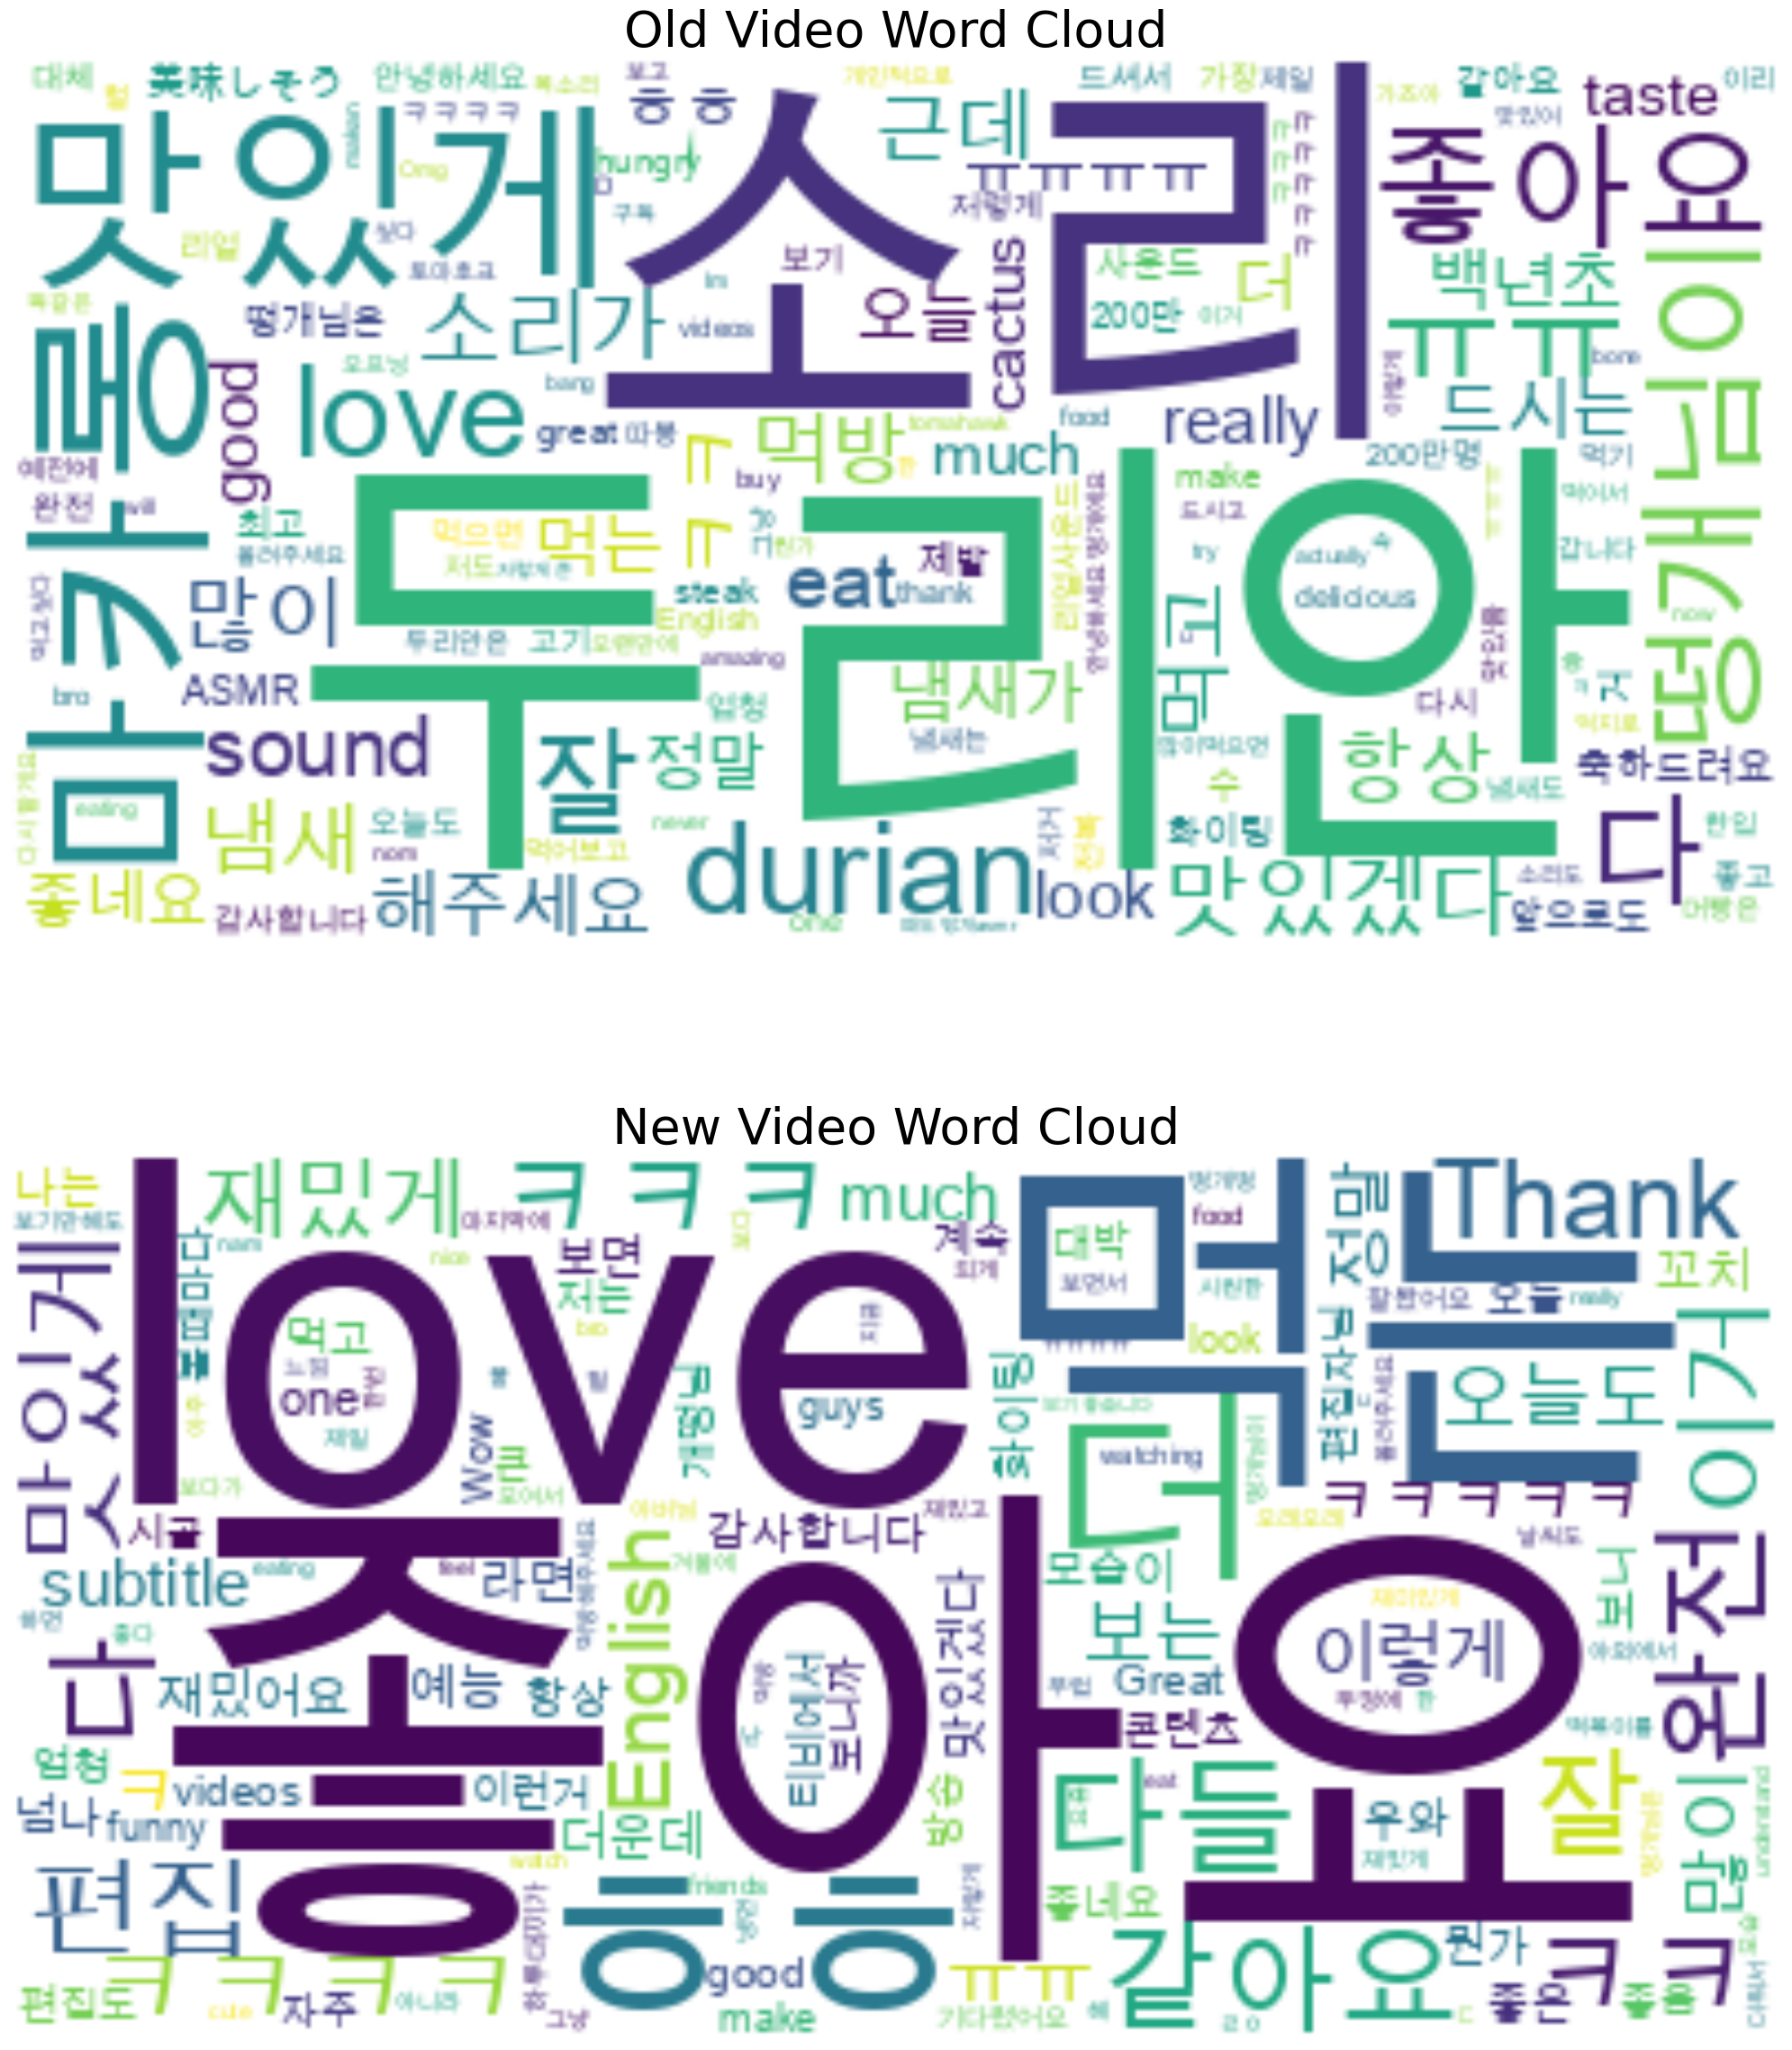

In [8]:
# Set WordCloud parameters:
# 1. max_words: Limit the visualization to the top 200 most frequent words
# 2. stopwords: Exclude common words (the, a, is)
# 3. font_path : Use font compatible with unicode
wc_settings = {
    "max_words": 200,
    "background_color": "white",
    "font_path": "/Library/Fonts/Arial Unicode.ttf",
    "stopwords": total_stopwords,
}

old_wordcloud = WordCloud(**wc_settings).generate(old_text)
new_wordcloud = WordCloud(**wc_settings).generate(new_text)


plt.figure(figsize=(20, 25))

plt.subplot(2, 1, 1)
plt.imshow(old_wordcloud, interpolation="bilinear")
plt.title("Old Video Word Cloud", fontsize=40)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(new_wordcloud, interpolation="bilinear")
plt.title("New Video Word Cloud", fontsize=40)
plt.axis("off")

plt.tight_layout()
plt.show()

### Bar Chart

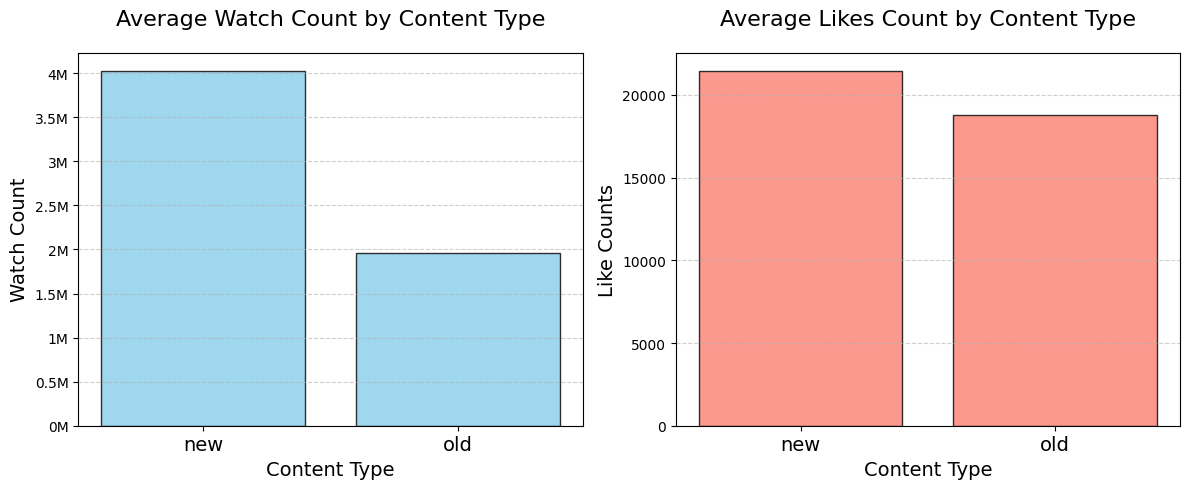

In [9]:
def millions_formatter(x, pos):
    return f"{x * 1e-6:g}M"


grouped_df = (
    df.groupby("content_type")[["video_watch_count", "video_like_count"]]
    .mean()
    .reset_index()
)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: Watch Count
ax1.bar(
    grouped_df["content_type"],
    grouped_df["video_watch_count"],
    color="skyblue",
    edgecolor="black",
    alpha=0.8,
)
ax1.set_title("Average Watch Count by Content Type", fontsize=16, pad=20)
ax1.set_xlabel("Content Type", fontsize=14)
ax1.set_ylabel("Watch Count", fontsize=14)
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax1.tick_params(axis="x", labelsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.6)

# Right: Like Count
ax2.bar(
    grouped_df["content_type"],
    grouped_df["video_like_count"],
    color="salmon",
    edgecolor="black",
    alpha=0.8,
)
ax2.set_title("Average Likes Count by Content Type", fontsize=16, pad=20)
ax2.set_xlabel("Content Type", fontsize=14)
ax2.set_ylabel("Likes Counts", fontsize=14)
ax2.tick_params(axis="x", labelsize=14)
ax2.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()